# Generate coef overlay for tract mapping

- Project:        HCP-EP
- File Name:      Generate_overlay
- Author:         Haley Wang
- Date Created:   2023-08-07
- Last Modified:  2023-08-08
- Code Status:    TESTING

In [1]:
from pathlib import Path
import h5py
import os
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import scipy.stats as sstats

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#pd.reset_option('all')

### Import PLS results from both EP and MEND

In [77]:
"""
load data
"""

df_all = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_MEND_Replication/tracts_interpretation.csv')

In [78]:
# the 4 dfs are df_FA, df_MD, df_AD, df_RD

# import JHU lookup table
lut = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/lut_w_group.csv')

In [79]:
# Get unique values in the 'column_name' column
unique_values = df_all['Metrics'].unique()

In [80]:
#cmap = matplotlib.cm.get_cmap('YlOrBr') #orange
cmap = matplotlib.cm.get_cmap('RdYlBu') #Blues, Blues_r for reverse
norm = matplotlib.colors.Normalize(vmin=-0.51, vmax=0.51)

In [81]:
# Separate DataFrames without using a dictionary
for value in unique_values:
    filtered_df = df_all[df_all['Metrics'] == value]
    filtered_df.reset_index(drop=True, inplace=True)
    filtered_df['Tracts'] = lut['Label']
    
    # Add an empty column named 'new_column' as the second column
    filtered_df.insert(1, 'Groups', pd.Series())
    filtered_df['Groups'] = lut['Groups']

    globals()[f'df_{value}'] = filtered_df

In [45]:
# List of dataframes to concatenate
temp = [df_FA, df_MD, df_AD, df_RD]

# Concatenate vertically
result_df = pd.concat(temp, axis=0)

# Reset index if needed
result_df.reset_index(drop=True, inplace=True)

result_df.to_csv('classified_tracts_w_coefs.csv', index=False)

### For EP

In [75]:
# List of dataframes
dataframes = [df_FA, df_MD, df_AD, df_RD]

# Define the operations you want to perform
def generate_RGBA(df):
    coef_RGB = cmap(norm(df['EP_coefs']), bytes=True, alpha=0)
    df['R'], df['G'], df['B'], df['A'] = coef_RGB[:, 0], coef_RGB[:, 1], coef_RGB[:, 2], coef_RGB[:, 3]
    df.loc[df['EP_CI'] <= 0, ['R', 'G', 'B']] = 255
    df.loc[df['EP_CI'] <= 0, ['A']] = 0
    
    # Drop unnecessary columns
    columns_to_drop = ['Groups', 'Metrics', 'EP_coefs', 'MEND_coefs', 'EP_error', 'MEND_error', 'EP_CI', 'MEND_CI']
    df.drop(columns=columns_to_drop, inplace=True)
    
    # Create a new column 'Index' with values from 1 to 48
    df.insert(0, 'Index', range(1, 49))
    return df

# Loop through the list of dataframes and apply the operations
for i, df in enumerate(dataframes):
    dataframes[i] = generate_RGBA(df)

In [76]:
df_FA.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/EP_FA.txt', sep=" ", index=False, header=False)
df_MD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/EP_MD.txt', sep=" ", index=False, header=False)
df_AD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/EP_AD.txt', sep=" ", index=False, header=False)
df_RD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/EP_RD.txt', sep=" ", index=False, header=False)

### For MEND

In [82]:
### make sure to re-run the data import

# List of dataframes
dataframes = [df_FA, df_MD, df_AD, df_RD]

# Define the operations you want to perform
def generate_RGBA(df):
    coef_RGB = cmap(norm(df['MEND_coefs']), bytes=True, alpha=0)
    df['R'], df['G'], df['B'], df['A'] = coef_RGB[:, 0], coef_RGB[:, 1], coef_RGB[:, 2], coef_RGB[:, 3]
    df.loc[df['EP_CI'] <= 0, ['R', 'G', 'B']] = 255
    df.loc[df['EP_CI'] <= 0, ['A']] = 0
    
    # Drop unnecessary columns
    columns_to_drop = ['Groups', 'Metrics', 'EP_coefs', 'MEND_coefs', 'EP_error', 'MEND_error', 'EP_CI', 'MEND_CI']
    df.drop(columns=columns_to_drop, inplace=True)
    
    # Create a new column 'Index' with values from 1 to 48
    df.insert(0, 'Index', range(1, 49))
    return df

# Loop through the list of dataframes and apply the operations
for i, df in enumerate(dataframes):
    dataframes[i] = generate_RGBA(df)

In [83]:
df_FA.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/MEND_FA.txt', sep=" ", index=False, header=False)
df_MD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/MEND_MD.txt', sep=" ", index=False, header=False)
df_AD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/MEND_AD.txt', sep=" ", index=False, header=False)
df_RD.to_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/MEND_RD.txt', sep=" ", index=False, header=False)

### Freeview console code, for reference

In [ ]:
os.chdir('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization')

os.system('freeview
-v /u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/MNI152_T1_1mm_brain.nii.gz:colormap=grayscale:grayscale=3735,8817:isosurface=on:isosurface=1923,8817:isosurface_color=255,255,255:isosurface_smooth=18:extract_all_regions=0:opacity=0.65:smoothed=1
-v /u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/JHU-ICBM-labels-1mm.nii.gz:colormap=lut:lut=/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/visualization/final_color_tables/MEND_RD.txt:isosurface=on:isosurface_color=red:isosurface_smooth=14:smoothed=1
-hide-3d-frames
-nocursor
-cam dolly 1.42 azimuth 142 elevation 12 roll -2
-layout 4 
-ss output')

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [6]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

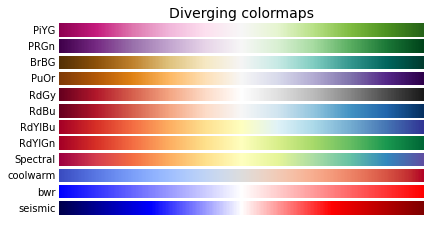

In [8]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])